In [ ]:
from PIL import Image

# 딥 러닝 프로젝트
- 주제: 영양성분표 분석
- 목차
    1. 파일 및 모듈 설치
    2. 텍스트 인식 데이터 생성
    3. 이미지파일 lmdb 변환(이미지 전처리)
    4. 모델 학습

## 1. 파일 및 모듈 설치
    1) Random Text recognition data 생성 툴(TextRecognitionDataGenerator) -> (trdg 이용)
    2) 생성데이터에서 텍스트 파일 생성(gt.txt) -> easyOCR 작업에서 데이터의 정답지
    3) easyOCR(https://github.com/clovaai/deep-text-recognition-benchmark)

In [ ]:
# 1-1 TextRecognitionDataGenerator 설치
!git clone https://github.com/Belval/TextRecognitionDataGenerator.git

Cloning into 'TextRecognitionDataGenerator'...
Updating files:  23% (136/576)
Updating files:  24% (139/576)
Updating files:  25% (144/576)
Updating files:  26% (150/576)
Updating files:  26% (154/576)
Updating files:  27% (156/576)
Updating files:  28% (162/576)
Updating files:  29% (168/576)
Updating files:  30% (173/576)
Updating files:  31% (179/576)
Updating files:  32% (185/576)
Updating files:  33% (191/576)
Updating files:  34% (196/576)
Updating files:  35% (202/576)
Updating files:  36% (208/576)
Updating files:  37% (214/576)
Updating files:  38% (219/576)
Updating files:  39% (225/576)
Updating files:  40% (231/576)
Updating files:  41% (237/576)
Updating files:  42% (242/576)
Updating files:  43% (248/576)
Updating files:  44% (254/576)
Updating files:  45% (260/576)
Updating files:  46% (265/576)
Updating files:  47% (271/576)
Updating files:  48% (277/576)
Updating files:  49% (283/576)
Updating files:  50% (288/576)
Updating files:  51% (294/576)
Updating files:  52% (3

In [ ]:
# 폴더 내 requirements 설치
!pip install -r C:\Users\NT551XCJ\DLP\Scripts\Projects\TextRecognitionDataGenerator\requirements.txt

  Using cached opencv_python-4.8.1.78-cp37-abi3-win_amd64.whl.metadata (20 kB)
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     --------------------- ------------------ 30.7/57.6 kB ? eta -:--:--
     --------------------------- ---------- 41.0/57.6 kB 653.6 kB/s eta 0:00:01
     -------------------------------------- 57.6/57.6 kB 378.9 kB/s eta 0:00:00
  Using cached diffimg-0.2.3-py3-none-any.whl
  Using cached arabic_reshaper-2.1.3-py3-none-any.whl (20 kB)
  Using cached wikipedia-1.4.0-py3-none-any.whl
  Using cached future-0.18.3-py3-none-any.whl
     ---------------------------------------- 0.0/61.2 kB ? eta -:--:--
     ------ --------------------------------- 10.2/61.2 kB ? eta -:--:--
     ------------------- ------------------ 30.7/61.2 kB 640.0 kB/s eta 0:00:01
     ------------------- ------------------ 30.7/61.2 kB 640.0 kB/s eta 0:00:01
     ------------------- ------------------ 30.7/61.2 kB 640.0 kB/s eta 0:00:01
     ------------------------

Reason for being yanked: Doesn't work with Python 2


In [ ]:
# 1-2 TRDG2DTRB 설치 (이미지 -> gt.txt 변환)
!git clone https://github.com/DaveLogs/TRDG2DTRB.git

Cloning into 'TRDG2DTRB'...


In [ ]:
# 1-3 Easy OCR 클론 -> 파이토치 기반
!git clone https://github.com/clovaai/deep-text-recognition-benchmark.git

Cloning into 'deep-text-recognition-benchmark'...


## 2. 텍스트 인식 데이터 생성
- TextRecognitionDataGenerator 이용
-
    1. TextRecognitionDataGenerator\trgd\font\ko 에 한글 폰트 넣어주기(1개 -> 38개, 내장 폰트이용)
       (한글 이미지 학습 목적. 넣지 않는다면 이미지가 깨져서 인식이 불가능함.) -> 수작업
       
    3. TextRecognitionDataGenerator\trgd\dict 폴더 안에 학습시킬 단어, 글자 등이 들어간 파일 넣기.
       ko_dict.txt 파일로 저장하여 학습->(한국표준시험분석연구원: http://www.ianf.co.kr/html/sub020103.php)
       
    4. 데이터 학습 실시(이미지 참조)
       - c : 생성 데이터 수
       - l : 사용할 딕셔너리(사용자가 만든 데이터셋 삽입)
       - w : 단어 개수(조합의 개수?)
       - f : font size(글자 크기)
       - output_dir : 출력 위치
       - fd : 글꼴 위치

    5. gt.txt 파일 생성(이미지 파일명이 텍스트 내용으로 변환되므로 이를 이용하여 처리)
       - convert.py = 변환 파일
       - input_path = 원본 변환 파일 위치
       - output_path = OCR용 파일 생성 위치

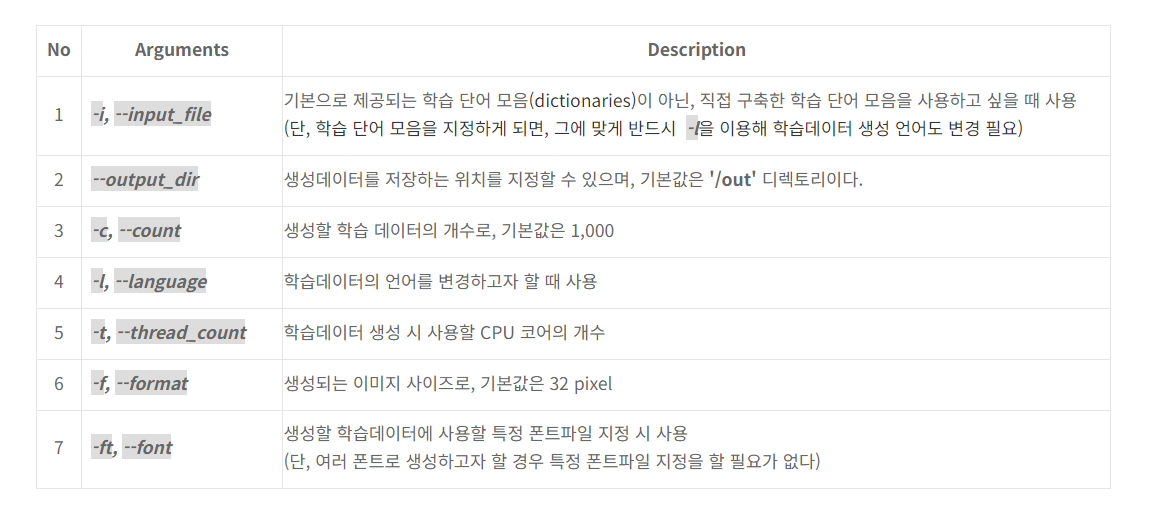

In [ ]:
Image.open('img.png')

In [ ]:
# 2-3 데이터 학습 (명령어 이용하여 학습, 파라미터는 위의 설명 참조), 5개만 생성 (train, validation 총 10개)
# Missing modules for handwritten text generation. => 손글씨 관련 모듈 없음 의미(여기서는 상관 없음)

# train data
# (Text skewing)
!python C:\Users\NT551XCJ\DLP\Scripts\Projects\TextRecognitionDataGenerator\trdg\run.py -c 600 -l ko_nu -w 3 -f 64 -k 5 -fd C:\Users\NT551XCJ\DLP\Scripts\Projects\TextRecognitionDataGenerator\trdg\fonts\ko --output_dir data\train
# (Text distortion)
!python C:\Users\NT551XCJ\DLP\Scripts\Projects\TextRecognitionDataGenerator\trdg\run.py -c 600 -l ko_nu -w 3 -f 64 -d 2 -fd C:\Users\NT551XCJ\DLP\Scripts\Projects\TextRecognitionDataGenerator\trdg\fonts\ko --output_dir data\train
# (Text blurring)
!python C:\Users\NT551XCJ\DLP\Scripts\Projects\TextRecognitionDataGenerator\trdg\run.py -c 600 -l ko_nu -w 3 -f 64 -bl 2 -fd C:\Users\NT551XCJ\DLP\Scripts\Projects\TextRecognitionDataGenerator\trdg\fonts\ko --output_dir data\train
# (Background)
!python C:\Users\NT551XCJ\DLP\Scripts\Projects\TextRecognitionDataGenerator\trdg\run.py -c 600 -l ko_nu -w 3 -f 64 -b 2 -fd C:\Users\NT551XCJ\DLP\Scripts\Projects\TextRecognitionDataGenerator\trdg\fonts\ko --output_dir data\train
# Basic (CLI)
!python C:\Users\NT551XCJ\DLP\Scripts\Projects\TextRecognitionDataGenerator\trdg\run.py -c 600 -l ko_nu -w 3 -f 64  -fd C:\Users\NT551XCJ\DLP\Scripts\Projects\TextRecognitionDataGenerator\trdg\fonts\ko --output_dir data\train

# validation data
# (Text skewing)
!python C:\Users\NT551XCJ\DLP\Scripts\Projects\TextRecognitionDataGenerator\trdg\run.py -c 200 -l ko_nu -w 3 -f 64 -k 5 -fd C:\Users\NT551XCJ\DLP\Scripts\Projects\TextRecognitionDataGenerator\trdg\fonts\ko --output_dir data\validation
# (Text distortion)
!python C:\Users\NT551XCJ\DLP\Scripts\Projects\TextRecognitionDataGenerator\trdg\run.py -c 200 -l ko_nu -w 3 -f 64 -d 2 -fd C:\Users\NT551XCJ\DLP\Scripts\Projects\TextRecognitionDataGenerator\trdg\fonts\ko --output_dir data\validation
# (Text blurring)
!python C:\Users\NT551XCJ\DLP\Scripts\Projects\TextRecognitionDataGenerator\trdg\run.py -c 200 -l ko_nu -w 3 -f 64 -bl 2 -fd C:\Users\NT551XCJ\DLP\Scripts\Projects\TextRecognitionDataGenerator\trdg\fonts\ko --output_dir data\validation
# (Background)
!python C:\Users\NT551XCJ\DLP\Scripts\Projects\TextRecognitionDataGenerator\trdg\run.py -c 200 -l ko_nu -w 3 -f 64 -b 2 -fd C:\Users\NT551XCJ\DLP\Scripts\Projects\TextRecognitionDataGenerator\trdg\fonts\ko --output_dir data\validation
# Basic (CLI)
!python C:\Users\NT551XCJ\DLP\Scripts\Projects\TextRecognitionDataGenerator\trdg\run.py -c 200 -l ko_nu -w 3 -f 64 -fd C:\Users\NT551XCJ\DLP\Scripts\Projects\TextRecognitionDataGenerator\trdg\fonts\ko --output_dir data\validation


# test data
# (Text skewing)
!python C:\Users\NT551XCJ\DLP\Scripts\Projects\TextRecognitionDataGenerator\trdg\run.py -c 200 -l ko_nu -w 3 -f 64 -k 5 -fd C:\Users\NT551XCJ\DLP\Scripts\Projects\TextRecognitionDataGenerator\trdg\fonts\ko --output_dir data\test
# (Text distortion)
!python C:\Users\NT551XCJ\DLP\Scripts\Projects\TextRecognitionDataGenerator\trdg\run.py -c 200 -l ko_nu -w 3 -f 64 -d 2 -fd C:\Users\NT551XCJ\DLP\Scripts\Projects\TextRecognitionDataGenerator\trdg\fonts\ko --output_dir data\test
# (Text blurring)
!python C:\Users\NT551XCJ\DLP\Scripts\Projects\TextRecognitionDataGenerator\trdg\run.py -c 200 -l ko_nu -w 3 -f 64 -bl 2 -fd C:\Users\NT551XCJ\DLP\Scripts\Projects\TextRecognitionDataGenerator\trdg\fonts\ko --output_dir data\test
# (Background)
!python C:\Users\NT551XCJ\DLP\Scripts\Projects\TextRecognitionDataGenerator\trdg\run.py -c 200 -l ko_nu -w 3 -f 64 -b 2 -fd C:\Users\NT551XCJ\DLP\Scripts\Projects\TextRecognitionDataGenerator\trdg\fonts\ko --output_dir data\test
# Basic (CLI)
!python C:\Users\NT551XCJ\DLP\Scripts\Projects\TextRecognitionDataGenerator\trdg\run.py -c 200 -l ko_nu -w 3 -f 64 -fd C:\Users\NT551XCJ\DLP\Scripts\Projects\TextRecognitionDataGenerator\trdg\fonts\ko --output_dir data\test

Missing modules for handwritten text generation.
Missing modules for handwritten text generation.



100%|##########| 600/600 [00:06<00:00, 86.16it/s]


Missing modules for handwritten text generation.
Missing modules for handwritten text generation.



100%|##########| 600/600 [00:09<00:00, 62.56it/s]


Missing modules for handwritten text generation.
Missing modules for handwritten text generation.



100%|##########| 600/600 [00:06<00:00, 87.10it/s]


Missing modules for handwritten text generation.
Missing modules for handwritten text generation.



100%|##########| 600/600 [03:27<00:00,  2.89it/s]


Missing modules for handwritten text generation.
Missing modules for handwritten text generation.



100%|##########| 600/600 [00:06<00:00, 89.67it/s]


Missing modules for handwritten text generation.
Missing modules for handwritten text generation.



100%|##########| 200/200 [00:02<00:00, 80.24it/s]


Missing modules for handwritten text generation.
Missing modules for handwritten text generation.



100%|##########| 200/200 [00:03<00:00, 59.33it/s]


Missing modules for handwritten text generation.
Missing modules for handwritten text generation.



100%|##########| 200/200 [00:02<00:00, 75.76it/s]


Missing modules for handwritten text generation.
Missing modules for handwritten text generation.



100%|##########| 200/200 [01:07<00:00,  2.94it/s]


Missing modules for handwritten text generation.
Missing modules for handwritten text generation.



100%|##########| 200/200 [00:02<00:00, 81.33it/s]


Missing modules for handwritten text generation.
Missing modules for handwritten text generation.



100%|##########| 200/200 [00:02<00:00, 82.01it/s]


Missing modules for handwritten text generation.
Missing modules for handwritten text generation.



100%|##########| 200/200 [00:03<00:00, 57.64it/s]


Missing modules for handwritten text generation.
Missing modules for handwritten text generation.



100%|##########| 200/200 [00:02<00:00, 72.92it/s]


Missing modules for handwritten text generation.
Missing modules for handwritten text generation.



100%|##########| 200/200 [01:05<00:00,  3.04it/s]


Missing modules for handwritten text generation.
Missing modules for handwritten text generation.



100%|##########| 200/200 [00:02<00:00, 80.26it/s]


In [ ]:
# 버전 문제로 pillow 모듈 다운그레이드 실시(get_size 관련 오류 발생)
!pip install pillow==9.5.0

  Using cached Pillow-9.5.0-cp310-cp310-win_amd64.whl (2.5 MB)
  Attempting uninstall: pillow
    Found existing installation: Pillow 10.1.0
    Uninstalling Pillow-10.1.0:
      Successfully uninstalled Pillow-10.1.0


In [ ]:
# 2-4 gt.txt 파일 생성하기(TRDG2DTRB 내 convert.py 이용)
# gt.txt의 내용 = 파일명    텍스트 내용 \n 파일명    텍스트 내용 \n ... 순으로 나열되어 있는 형태

# train data
!python C:\Users\NT551XCJ\DLP\Scripts\Projects\TRDG2DTRB\convert.py --input_path C:\Users\NT551XCJ\DLP\Scripts\Projects\data\train --output_path C:\Users\NT551XCJ\DLP\Scripts\Projects\deep-text-recognition-benchmark\data\train

# validation data
!python C:\Users\NT551XCJ\DLP\Scripts\Projects\TRDG2DTRB\convert.py --input_path C:\Users\NT551XCJ\DLP\Scripts\Projects\data\validation --output_path C:\Users\NT551XCJ\DLP\Scripts\Projects\deep-text-recognition-benchmark\data\validation

# test data
!python C:\Users\NT551XCJ\DLP\Scripts\Projects\TRDG2DTRB\convert.py --input_path C:\Users\NT551XCJ\DLP\Scripts\Projects\data\test --output_path C:\Users\NT551XCJ\DLP\Scripts\Projects\deep-text-recognition-benchmark\data\test

input path:  C:\Users\NT551XCJ\DLP\Scripts\Projects\data\train
output path:  C:\Users\NT551XCJ\DLP\Scripts\Projects\deep-text-recognition-benchmark\data\train
Total file count:  3000

 100 / 3000 Processing !!
 200 / 3000 Processing !!
 300 / 3000 Processing !!
 400 / 3000 Processing !!
 500 / 3000 Processing !!
 600 / 3000 Processing !!
 700 / 3000 Processing !!
 800 / 3000 Processing !!
 900 / 3000 Processing !!
1000 / 3000 Processing !!
1100 / 3000 Processing !!
1200 / 3000 Processing !!
1300 / 3000 Processing !!
1400 / 3000 Processing !!
1500 / 3000 Processing !!
1600 / 3000 Processing !!
1700 / 3000 Processing !!
1800 / 3000 Processing !!
1900 / 3000 Processing !!
2000 / 3000 Processing !!
2100 / 3000 Processing !!
2200 / 3000 Processing !!
2300 / 3000 Processing !!
2400 / 3000 Processing !!
2500 / 3000 Processing !!
2600 / 3000 Processing !!
2700 / 3000 Processing !!
2800 / 3000 Processing !!
2900 / 3000 Processing !!
3000 / 3000 Processing !!
Conversion complete!

input path:  C

## 이미지 변환(lmdb)
- Easy OCR은 데이터를 학습하기 전에 데이터셋을 .mdb확장자로 변환함
- 이를 위해 gt.txt가 포함된 폴더 형태로 데이터를 구성해야함.

In [ ]:
# 프로그램 실행 전 필요모듈 설치(requirements.txt가 없음.)
!pip install torch==1.13.1+cpu torchvision==0.14.1+cpu torchaudio==0.13.1 --extra-index-url https://download.pytorch.org/whl/cpu
!pip install lmdb pillow torchvision nltk natsort
!pip install fire

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cpu
     ---------------------------------------- 0.0/164.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/164.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/164.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/164.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/164.2 MB ? eta -:--:--
     -------------------------------------- 0.1/164.2 MB 238.1 kB/s eta 0:11:30
     -------------------------------------- 0.1/164.2 MB 238.1 kB/s eta 0:11:30
     -------------------------------------- 0.1/164.2 MB 238.1 kB/s eta 0:11:30
     -------------------------------------- 0.1/164.2 MB 238.1 kB/s eta 0:11:30
     -------------------------------------- 0.1/164.2 MB 238.1 kB/s eta 0:11:30
     -------------------------------------- 0.1/164.2 MB 285.2 kB/s eta 0:09:36
     -------------------------------------- 0.1/164.2 MB 285.2 kB/s eta 0

In [ ]:
# 데이터 변환 프로그램 실행(map size 변수 초기값이 매우 크므로 축소후 진행해야함.)

# Converting train data to LMDB
!python C:\Users\NT551XCJ\DLP\Scripts\Projects/deep-text-recognition-benchmark/create_lmdb_dataset.py \
    --gtFile C:\Users\NT551XCJ\DLP\Scripts\Projects\deep-text-recognition-benchmark\data\train\gt.txt \
    --inputPath C:\Users\NT551XCJ\DLP\Scripts\Projects\deep-text-recognition-benchmark\data\train \
    --outputPath C:\Users\NT551XCJ\DLP\Scripts\Projects\deep-text-recognition-benchmark\lmdb_data\train

# Converting train data to LMDB
!python C:\Users\NT551XCJ\DLP\Scripts\Projects/deep-text-recognition-benchmark/create_lmdb_dataset.py \
    --gtFile C:\Users\NT551XCJ\DLP\Scripts\Projects\deep-text-recognition-benchmark\data\validation\gt.txt \
    --inputPath C:\Users\NT551XCJ\DLP\Scripts\Projects\deep-text-recognition-benchmark\data\validation \
    --outputPath C:\Users\NT551XCJ\DLP\Scripts\Projects\deep-text-recognition-benchmark\lmdb_data\validation

# Converting train data to LMDB
!python C:\Users\NT551XCJ\DLP\Scripts\Projects/deep-text-recognition-benchmark/create_lmdb_dataset.py \
    --gtFile C:\Users\NT551XCJ\DLP\Scripts\Projects\deep-text-recognition-benchmark\data\validation\gt.txt \
    --inputPath C:\Users\NT551XCJ\DLP\Scripts\Projects\deep-text-recognition-benchmark\data\test \
    --outputPath C:\Users\NT551XCJ\DLP\Scripts\Projects\deep-text-recognition-benchmark\lmdb_data\test

Written 1000 / 3000
Written 2000 / 3000
Written 3000 / 3000
Created dataset with 3000 samples
Written 1000 / 1000
Created dataset with 1000 samples
Written 1000 / 1000
Created dataset with 1000 samples


## 모델 학습
- 변환된 파일을 이용하여 학습 실시
- 동일 폴더 내 train.py 이용
- 학습 데이터 수 3000개 8000회 학습 실시

In [ ]:
# 모델 학습
!python C:\Users\NT551XCJ\DLP\Scripts\Projects\deep-text-recognition-benchmark\train.py --train_data C:\Users\NT551XCJ\DLP\Scripts\Projects\deep-text-recognition-benchmark\lmdb_data\train --valid_data C:\Users\NT551XCJ\DLP\Scripts\Projects\deep-text-recognition-benchmark\lmdb_data\validation --select_data / --batch_ratio 1 --Transformation None --FeatureExtraction "VGG" --SequenceModeling "BiLSTM" --Prediction "CTC" --input_channel 1 --output_channel 256 --hidden_size 256 --saved_model C:\Users\NT551XCJ\DLP\Scripts\Projects\deep-text-recognition-benchmark\trained_model\korean_g2.pth --valInterval 10 --num_iter 8000 --FT --workers 0

^C
--------------------------------------------------------------------------------
dataset_root: C:\Users\NT551XCJ\DLP\Scripts\Projects\deep-text-recognition-benchmark\lmdb_data\train
opt.select_data: ['/']
opt.batch_ratio: ['1']
--------------------------------------------------------------------------------
dataset_root:    C:\Users\NT551XCJ\DLP\Scripts\Projects\deep-text-recognition-benchmark\lmdb_data\train	 dataset: /
sub-directory:	/.	 num samples: 3000
num total samples of /: 3000 x 1.0 (total_data_usage_ratio) = 3000
num samples of / per batch: 192 x 1.0 (batch_ratio) = 192
--------------------------------------------------------------------------------
Total_batch_size: 192 = 192
--------------------------------------------------------------------------------
dataset_root:    C:\Users\NT551XCJ\DLP\Scripts\Projects\deep-text-recognition-benchmark\lmdb_data\validation	 dataset: /
sub-directory:	/.	 num samples: 1000
--------------------------------------------------------------

Traceback (most recent call last):
  File "C:\Users\NT551XCJ\DLP\Scripts\Projects\deep-text-recognition-benchmark\train.py", line 320, in <module>
    train(opt)
  File "C:\Users\NT551XCJ\DLP\Scripts\Projects\deep-text-recognition-benchmark\train.py", line 180, in train
    with open(f'./saved_models/{opt.exp_name}/log_train.txt', 'a') as log:
FileNotFoundError: [Errno 2] No such file or directory: './saved_models/None-VGG-BiLSTM-CTC-Seed1111/log_train.txt'
